source /home/hemoa001/anaconda3/etc/profile.d/conda.sh

# 1. 상의 하의 검출

**roboflow**에서 라벨링 한 data: objection_detection

바운딩 박스 좌표가 담겨져있는 txt 파일 내의 라벨링을 실행.   
두번째 줄의 0을 1로 변경. (0: 상의, 1: 하의)

In [2]:
import os

# train set에 대한 하의 1 변경
dataset_train = '/data1/project/seoeun/BAF/object_detection/train/labels'  # 텍스트 파일이 있는 폴더 경로

# 폴더 내의 모든 텍스트 파일에 대해 작업
for filename in os.listdir(dataset_train):
    if filename.endswith(".txt"):
        file_path = os.path.join(dataset_train, filename)

        # 텍스트 파일 읽기
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # 두 번째 줄이 존재하고, 맨 앞의 숫자가 0일 경우에만 작업 수행
        if len(lines) > 1 and lines[1][0] == '0':
            # 두 번째 줄의 맨 앞의 0을 1로 변경
            lines[1] = '1' + lines[1][1:]

            # 변경된 텍스트 파일 저장 (기존 파일 덮어쓰기)
            with open(file_path, 'w') as file:
                file.writelines(lines)

In [3]:
# valid set에 대한 하의 1 변경
dataset_valid = '/data1/project/seoeun/BAF/object_detection/valid/labels'  # 텍스트 파일이 있는 폴더 경로

# 폴더 내의 모든 텍스트 파일에 대해 작업
for filename in os.listdir(dataset_valid):
    if filename.endswith(".txt"):
        file_path = os.path.join(dataset_valid, filename)

        # 텍스트 파일 읽기
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # 두 번째 줄이 존재하고, 맨 앞의 숫자가 0일 경우에만 작업 수행
        if len(lines) > 1 and lines[1][0] == '0':
            # 두 번째 줄의 맨 앞의 0을 1로 변경
            lines[1] = '1' + lines[1][1:]

            # 변경된 텍스트 파일 저장 (기존 파일 덮어쓰기)
            with open(file_path, 'w') as file:
                file.writelines(lines)

In [4]:
# test set에 대한 하의 1 변경
dataset_test = '/data1/project/seoeun/BAF/object_detection/test/labels'  # 텍스트 파일이 있는 폴더 경로

# 폴더 내의 모든 텍스트 파일에 대해 작업
for filename in os.listdir(dataset_test):
    if filename.endswith(".txt"):
        file_path = os.path.join(dataset_test, filename)

        # 텍스트 파일 읽기
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # 두 번째 줄이 존재하고, 맨 앞의 숫자가 0일 경우에만 작업 수행
        if len(lines) > 1 and lines[1][0] == '0':
            # 두 번째 줄의 맨 앞의 0을 1로 변경
            lines[1] = '1' + lines[1][1:]

            # 변경된 텍스트 파일 저장 (기존 파일 덮어쓰기)
            with open(file_path, 'w') as file:
                file.writelines(lines)

## **YOLOv5** 

YOLOv5 설치

In [5]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.64% (103/160)
remote: Compressing objects: 100% (111/111), done.
remote: Total 16965 (delta 81), reused 102 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 10.79 MiB/s, done.
Resolving deltas: 100% (11619/11619), done.


In [7]:
%cd /data1/project/seoeun/BAF/yolov5/
!pip install -r requirements.txt

/data1/project/seoeun/BAF/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 11.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.1/874.1 kB 8.9 MB/s eta 0:00:00


data.yaml 파일 수정 필요.  
name:  
- Top  
- Bottom  
  
nc: 2  

train: /경로 정확히 /images까지 지정  

In [17]:
!python  train.py --img 416 --batch 16 --epochs 100 --data /data1/project/seoeun/BAF/object_detection/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name best_yolov5s_result
# 15m 33.8s 걸림.

2024-09-26 14:46:46.709243: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 14:46:46.724751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 14:46:46.729423: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/data1/project/seoeun/BAF/object_detection/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_w

In [18]:
import torch

if torch.cuda.is_available():
    print(f"Current CUDA Device ID: {torch.cuda.current_device()}")
    print(f"Device Name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("No GPU available")

Current CUDA Device ID: 0
Device Name: NVIDIA GeForce RTX 4090


In [19]:
pwd

'/data1/project/seoeun/BAF/yolov5'

In [20]:
%load_ext tensorboard
%tensorboard --logdir /data1/project/seoeun/BAF/yolov5/runs


## 상의, 하의 검출 확인하기

In [23]:
!python detect.py --weights runs/train/best_yolov5s_result3/weights/best.pt --source "/data1/project/seoeun/BAF/test1.jpg"

detect: weights=['runs/train/best_yolov5s_result3/weights/best.pt'], source=/data1/project/seoeun/BAF/test1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.9.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /data1/project/seoeun/BAF/test1.jpg: 640x448 1 Top, 1 Bottom, 31.5ms
Speed: 0.5ms pre-process, 31.5ms inference, 369.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [24]:
!python detect.py --weights runs/train/best_yolov5s_result3/weights/best.pt --source "/data1/project/seoeun/BAF/test2.jpg"

detect: weights=['runs/train/best_yolov5s_result3/weights/best.pt'], source=/data1/project/seoeun/BAF/test2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.9.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /data1/project/seoeun/BAF/test2.jpg: 640x448 1 Top, 1 Bottom, 30.5ms
Speed: 0.4ms pre-process, 30.5ms inference, 360.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


In [25]:
!python detect.py --weights runs/train/best_yolov5s_result3/weights/best.pt --source "/data1/project/seoeun/BAF/test3.jpg"

detect: weights=['runs/train/best_yolov5s_result3/weights/best.pt'], source=/data1/project/seoeun/BAF/test3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.9.20 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /data1/project/seoeun/BAF/test3.jpg: 640x448 1 Top, 1 Bottom, 30.6ms
Speed: 0.4ms pre-process, 30.6ms inference, 354.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


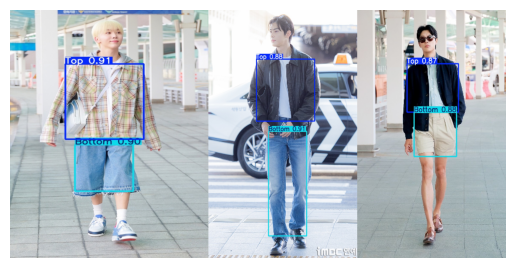

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt  # 일반 Python 환경에서 이미지 출력용

# 이미지 경로 설정
img_path1 = '/data1/project/seoeun/BAF/yolov5/runs/detect/exp3/test1.jpg'
img_path2 = '/data1/project/seoeun/BAF/yolov5/runs/detect/exp4/test2.jpg'
img_path3 = '/data1/project/seoeun/BAF/yolov5/runs/detect/exp5/test3.jpg'

# 이미지 읽기
img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)
img3 = cv2.imread(img_path3)

# 이미지가 잘 로드되었는지 확인
if img1 is None or img2 is None or img3 is None:
    print("Error: One or more images could not be loaded.")
else:
    # 이미지 크기 조정
    new_size1 = (400, 500)
    new_size2 = (300, 500)
    new_size3 = (300, 500)
    
    img1 = cv2.resize(img1, new_size1)
    img2 = cv2.resize(img2, new_size2)
    img3 = cv2.resize(img3, new_size3)

    # 이미지 가로로 연결
    concatenated_img = np.concatenate((img1, img2, img3), axis=1)

    # 이미지 출력 (Matplotlib 사용)
    plt.imshow(cv2.cvtColor(concatenated_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 축 제거
    plt.show()
